## Exercise
You will use the Wine Quality (http://archive.ics.uci.edu/ml/datasets/Wine+Quality) dataset. Use only the red wine data. The goal is to find the quality score of some wine based on its attributes. Write your code in a script neural_net.py. 

1)	First, download the winequality-red.csv file, load it, and divide the data into a training and test set using approximately 50% for training. Standardize the data, by computing the mean and standard deviation for each feature dimension using the training set only, then subtracting the mean and dividing by the stdev for each feature and each sample. Append a 1 for each feature vector, which will correspond to the bias that our model learns. Set the number of hidden units, the number of iterations to run, and the learning rate. 
2)	Call the backward function to construct and train the network. Use 1000 iterations and 30 hidden neurons. 
3)	Then call the forward function to make predictions and compute the root mean squared error between predicted and ground-truth labels. Report this number in a file lab3.pdf/docx 
4)	Experiment with three different values of the learning rate. For each, plot the error over time (output by backward above). Include these plots in your report.


# gather the data and investigate it 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
features = np.array(df.columns[:-1])
features

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [6]:
label = df.columns[-1]
label

'quality'

In [7]:
# find duplicated rows 
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# the number of unique values of quality and the count of each one 
df.quality.nunique()

6

In [10]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
import matplotlib.pyplot as plt

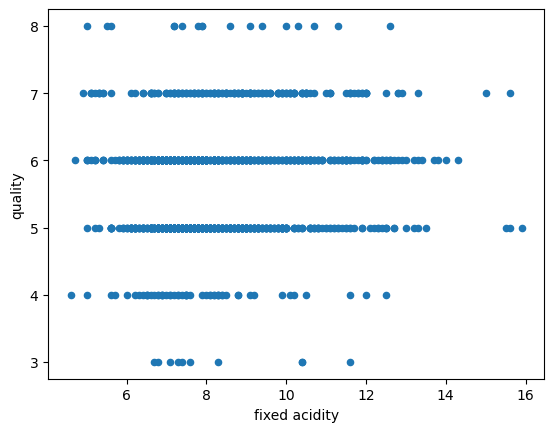

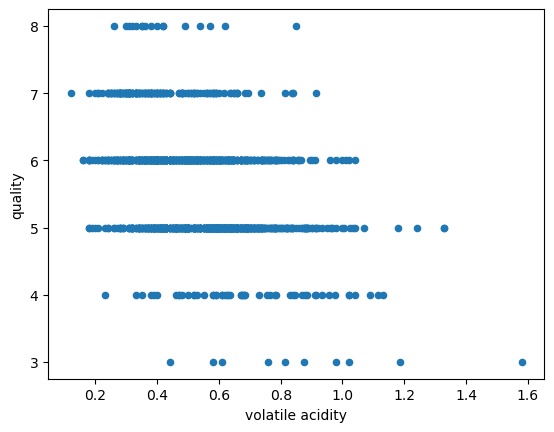

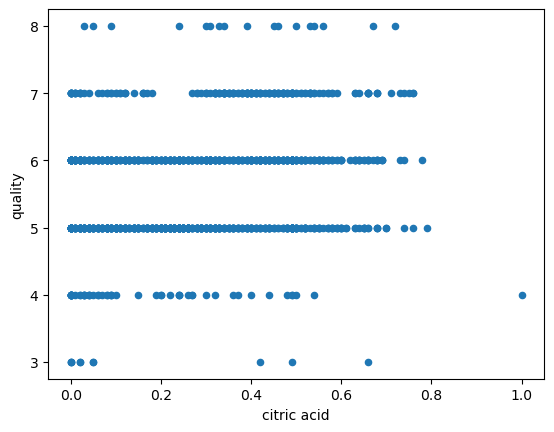

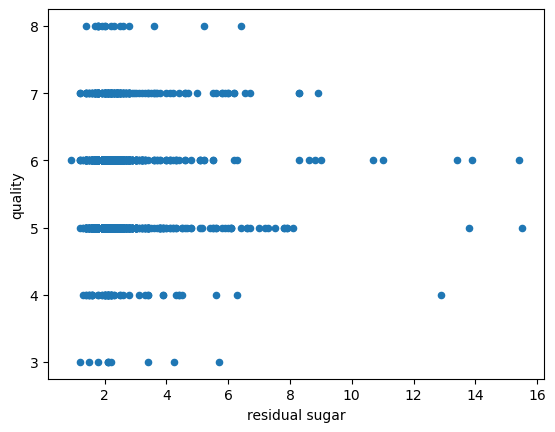

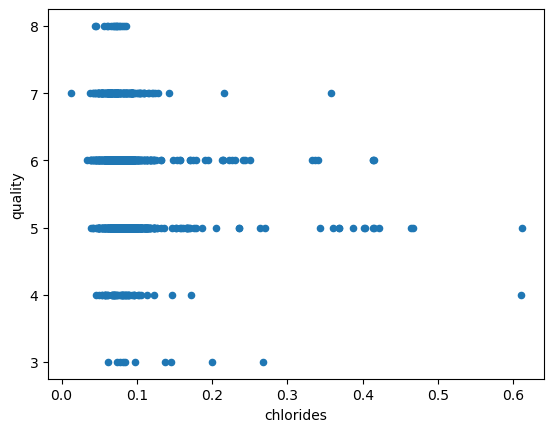

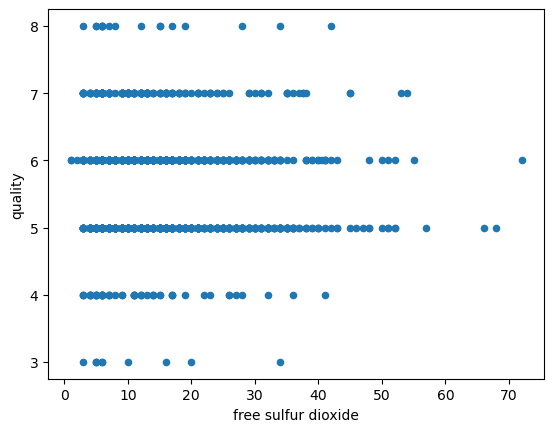

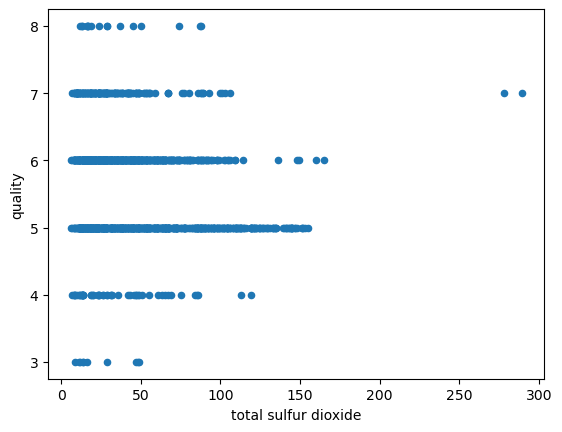

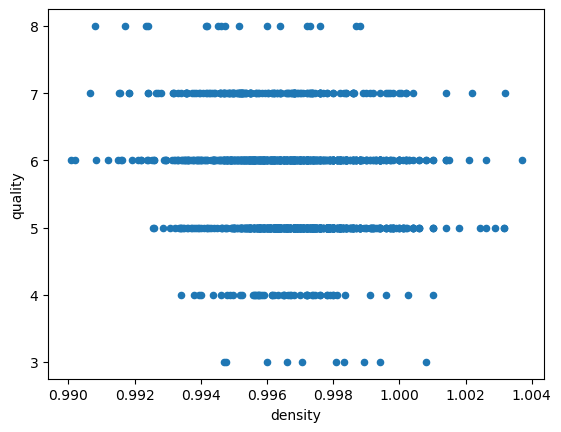

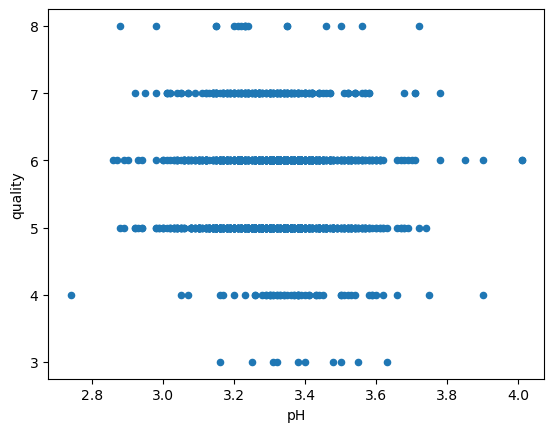

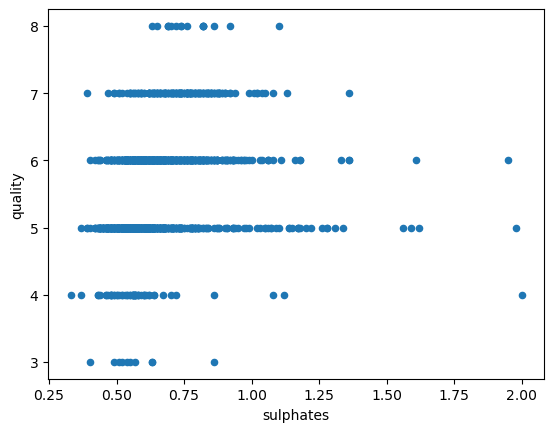

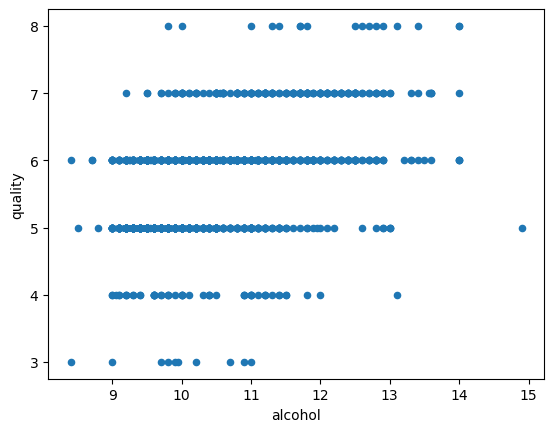

In [13]:
for i, feature in enumerate(features):
    df.plot(x=feature,y=label,kind='scatter')

## split the data 

In [14]:
df[features]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
X = df[features].to_numpy()
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [16]:
X.shape

(1359, 11)

In [17]:
Y = df[label].to_numpy()
Y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [18]:
Y.shape

(1359,)

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test , y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
x_train, x_val , y_train, y_val = train_test_split(x_train,y_train,test_size=0.25)

In [22]:
x_train.shape,y_train.shape

((815, 11), (815,))

In [23]:
x_val.shape,y_val.shape

((272, 11), (272,))

In [24]:
x_test.shape,y_test.shape

((272, 11), (272,))

## normalize the data 

In [25]:
scalar = preprocessing.StandardScaler()
x_train = scalar.fit_transform(x_train)
x_val = scalar.transform(x_val)
x_test = scalar.transform(x_test)

In [26]:
x_train.mean(),x_train.std()

(4.297000259485293e-14, 0.9999999999999997)

## train the NN

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [28]:
# hyper parameters
n_nodes = [32,64]
batch_sizes = [512,1024]
optimizers = [tf.keras.optimizers.Adam,tf.keras.optimizers.SGD]
drop_outs = [0,0.5,0.7]
learning_rates = [0.001,0.0003,0.0001]
optimizerss = {"Adam":"adam","keras.optimizers.optimizer_v2.gradient_descent.SGD":"sgd"}

In [29]:
n_features = x_train.shape[1]
n_features

11

In [30]:
histories = {}
for n_node in n_nodes:
    for batch_size in batch_sizes:
        for optimizer in optimizers:
            for drop_out in drop_outs:
                for learning_rate in learning_rates:
                    NAME = f"hidden nodes {n_node} batch size {batch_size} optimizer {str(optimizer)[43:47]} drop out {drop_out} learning rate {learning_rate}"
                    tensorbaord = TensorBoard(log_dir="LAB3final/{}".format(NAME))
                    
                    early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
                    
                    model = Sequential([
                        Dense(n_node,activation='tanh',input_shape=((11,))),
                        tf.keras.layers.Dropout(drop_out),
                        Dense(n_node,activation='tanh'),
                        tf.keras.layers.Dropout(drop_out),
                        Dense(1,activation='linear')
                    ])
                    opt_dict = {'optimizer':optimizer(learning_rate=learning_rate)}
                    model.compile(loss='mean_squared_error',metrics=['mean_absolute_error'],**opt_dict)
                    history = model.fit(x_train,y_train,epochs=20,batch_size=batch_size,validation_data=(x_val,y_val),callbacks=[early_stop,tensorbaord])
                    histories[NAME] = history

Epoch 1/20
2/2 [==============================] - 2s 614ms/step - loss: 32.0686 - mean_absolute_error: 5.5843 - val_loss: 32.6178 - val_mean_absolute_error: 5.6266
Epoch 2/20
2/2 [==============================] - 0s 181ms/step - loss: 31.7198 - mean_absolute_error: 5.5550 - val_loss: 32.2882 - val_mean_absolute_error: 5.5997
Epoch 3/20
2/2 [==============================] - 0s 213ms/step - loss: 31.3895 - mean_absolute_error: 5.5275 - val_loss: 31.9465 - val_mean_absolute_error: 5.5718
Epoch 4/20
2/2 [==============================] - 0s 146ms/step - loss: 31.0699 - mean_absolute_error: 5.5007 - val_loss: 31.6160 - val_mean_absolute_error: 5.5444
Epoch 5/20
2/2 [==============================] - 0s 289ms/step - loss: 30.7476 - mean_absolute_error: 5.4731 - val_loss: 31.2944 - val_mean_absolute_error: 5.5168
Epoch 6/20
2/2 [==============================] - 1s 534ms/step - loss: 30.4236 - mean_absolute_error: 5.4445 - val_loss: 30.9705 - val_mean_absolute_error: 5.4884
Epoch 7/20
2/2 [

Epoch 11/20
2/2 [==============================] - 0s 203ms/step - loss: 31.3991 - mean_absolute_error: 5.5244 - val_loss: 32.2266 - val_mean_absolute_error: 5.5985
Epoch 12/20
2/2 [==============================] - 0s 266ms/step - loss: 31.3565 - mean_absolute_error: 5.5208 - val_loss: 32.1845 - val_mean_absolute_error: 5.5951
Epoch 13/20
2/2 [==============================] - 1s 547ms/step - loss: 31.3146 - mean_absolute_error: 5.5173 - val_loss: 32.1427 - val_mean_absolute_error: 5.5916
Epoch 14/20
2/2 [==============================] - 0s 328ms/step - loss: 31.2732 - mean_absolute_error: 5.5138 - val_loss: 32.1008 - val_mean_absolute_error: 5.5881
Epoch 15/20
2/2 [==============================] - 0s 297ms/step - loss: 31.2318 - mean_absolute_error: 5.5104 - val_loss: 32.0584 - val_mean_absolute_error: 5.5847
Epoch 16/20
2/2 [==============================] - 0s 375ms/step - loss: 31.1897 - mean_absolute_error: 5.5068 - val_loss: 32.0164 - val_mean_absolute_error: 5.5812
Epoch 17/2

Epoch 1/20
2/2 [==============================] - 3s 2s/step - loss: 32.1087 - mean_absolute_error: 5.5377 - val_loss: 32.5489 - val_mean_absolute_error: 5.6510
Epoch 2/20
2/2 [==============================] - 1s 1s/step - loss: 33.0500 - mean_absolute_error: 5.6255 - val_loss: 32.5250 - val_mean_absolute_error: 5.6490
Epoch 3/20
2/2 [==============================] - 1s 973ms/step - loss: 32.4462 - mean_absolute_error: 5.5655 - val_loss: 32.5004 - val_mean_absolute_error: 5.6470
Epoch 4/20
2/2 [==============================] - 1s 971ms/step - loss: 32.6995 - mean_absolute_error: 5.5957 - val_loss: 32.4753 - val_mean_absolute_error: 5.6450
Epoch 5/20
2/2 [==============================] - 1s 797ms/step - loss: 32.7518 - mean_absolute_error: 5.5913 - val_loss: 32.4502 - val_mean_absolute_error: 5.6430
Epoch 6/20
2/2 [==============================] - 0s 345ms/step - loss: 32.1120 - mean_absolute_error: 5.5396 - val_loss: 32.4251 - val_mean_absolute_error: 5.6410
Epoch 7/20
2/2 [======

Epoch 11/20
2/2 [==============================] - 0s 253ms/step - loss: 33.4835 - mean_absolute_error: 5.5399 - val_loss: 31.8509 - val_mean_absolute_error: 5.5994
Epoch 12/20
2/2 [==============================] - 0s 234ms/step - loss: 32.6066 - mean_absolute_error: 5.4768 - val_loss: 31.7704 - val_mean_absolute_error: 5.5921
Epoch 13/20
2/2 [==============================] - 0s 251ms/step - loss: 33.2641 - mean_absolute_error: 5.5262 - val_loss: 31.6904 - val_mean_absolute_error: 5.5848
Epoch 14/20
2/2 [==============================] - 0s 234ms/step - loss: 32.1135 - mean_absolute_error: 5.4438 - val_loss: 31.6110 - val_mean_absolute_error: 5.5776
Epoch 15/20
2/2 [==============================] - 0s 236ms/step - loss: 33.6067 - mean_absolute_error: 5.5742 - val_loss: 31.5321 - val_mean_absolute_error: 5.5704
Epoch 16/20
2/2 [==============================] - 0s 234ms/step - loss: 32.7338 - mean_absolute_error: 5.5056 - val_loss: 31.4538 - val_mean_absolute_error: 5.5633
Epoch 17/2

Epoch 1/20
2/2 [==============================] - 2s 719ms/step - loss: 32.5880 - mean_absolute_error: 5.6332 - val_loss: 32.1137 - val_mean_absolute_error: 5.5962
Epoch 2/20
2/2 [==============================] - 1s 563ms/step - loss: 32.3535 - mean_absolute_error: 5.6129 - val_loss: 31.8877 - val_mean_absolute_error: 5.5764
Epoch 3/20
2/2 [==============================] - 0s 281ms/step - loss: 32.1209 - mean_absolute_error: 5.5926 - val_loss: 31.6636 - val_mean_absolute_error: 5.5568
Epoch 4/20
2/2 [==============================] - 0s 422ms/step - loss: 31.8902 - mean_absolute_error: 5.5724 - val_loss: 31.4410 - val_mean_absolute_error: 5.5373
Epoch 5/20
2/2 [==============================] - 0s 266ms/step - loss: 31.6610 - mean_absolute_error: 5.5522 - val_loss: 31.2202 - val_mean_absolute_error: 5.5178
Epoch 6/20
2/2 [==============================] - 1s 581ms/step - loss: 31.4334 - mean_absolute_error: 5.5321 - val_loss: 31.0009 - val_mean_absolute_error: 5.4984
Epoch 7/20
2/2 [

Epoch 11/20
2/2 [==============================] - 0s 344ms/step - loss: 26.1412 - mean_absolute_error: 4.9705 - val_loss: 26.1009 - val_mean_absolute_error: 5.0418
Epoch 12/20
2/2 [==============================] - 0s 344ms/step - loss: 26.1283 - mean_absolute_error: 4.9573 - val_loss: 25.5277 - val_mean_absolute_error: 4.9843
Epoch 13/20
2/2 [==============================] - 0s 250ms/step - loss: 25.3429 - mean_absolute_error: 4.8972 - val_loss: 24.9605 - val_mean_absolute_error: 4.9265
Epoch 14/20
2/2 [==============================] - 0s 297ms/step - loss: 24.4611 - mean_absolute_error: 4.8026 - val_loss: 24.3928 - val_mean_absolute_error: 4.8682
Epoch 15/20
2/2 [==============================] - 0s 297ms/step - loss: 24.1630 - mean_absolute_error: 4.7529 - val_loss: 23.8371 - val_mean_absolute_error: 4.8105
Epoch 16/20
2/2 [==============================] - 0s 328ms/step - loss: 23.5313 - mean_absolute_error: 4.6909 - val_loss: 23.2981 - val_mean_absolute_error: 4.7536
Epoch 17/2

Epoch 1/20
2/2 [==============================] - 3s 2s/step - loss: 34.5170 - mean_absolute_error: 5.6446 - val_loss: 31.9729 - val_mean_absolute_error: 5.5852
Epoch 2/20
2/2 [==============================] - 0s 328ms/step - loss: 32.8621 - mean_absolute_error: 5.4825 - val_loss: 31.2901 - val_mean_absolute_error: 5.5251
Epoch 3/20
2/2 [==============================] - 0s 391ms/step - loss: 32.8810 - mean_absolute_error: 5.4984 - val_loss: 30.6029 - val_mean_absolute_error: 5.4634
Epoch 4/20
2/2 [==============================] - 0s 328ms/step - loss: 31.9362 - mean_absolute_error: 5.4317 - val_loss: 29.9425 - val_mean_absolute_error: 5.4036
Epoch 5/20
2/2 [==============================] - 0s 391ms/step - loss: 30.7778 - mean_absolute_error: 5.3131 - val_loss: 29.3075 - val_mean_absolute_error: 5.3454
Epoch 6/20
2/2 [==============================] - 0s 313ms/step - loss: 30.7138 - mean_absolute_error: 5.3197 - val_loss: 28.6843 - val_mean_absolute_error: 5.2873
Epoch 7/20
2/2 [===

Epoch 11/20
2/2 [==============================] - 0s 438ms/step - loss: 34.0437 - mean_absolute_error: 5.4955 - val_loss: 32.2413 - val_mean_absolute_error: 5.5463
Epoch 12/20
2/2 [==============================] - 0s 406ms/step - loss: 34.8877 - mean_absolute_error: 5.5799 - val_loss: 32.1607 - val_mean_absolute_error: 5.5395
Epoch 13/20
2/2 [==============================] - 1s 688ms/step - loss: 33.6962 - mean_absolute_error: 5.5231 - val_loss: 32.0845 - val_mean_absolute_error: 5.5330
Epoch 14/20
2/2 [==============================] - 0s 344ms/step - loss: 34.4616 - mean_absolute_error: 5.5796 - val_loss: 32.0072 - val_mean_absolute_error: 5.5264
Epoch 15/20
2/2 [==============================] - 0s 219ms/step - loss: 34.4931 - mean_absolute_error: 5.5357 - val_loss: 31.9307 - val_mean_absolute_error: 5.5199
Epoch 16/20
2/2 [==============================] - 0s 344ms/step - loss: 34.5685 - mean_absolute_error: 5.5823 - val_loss: 31.8527 - val_mean_absolute_error: 5.5132
Epoch 17/2

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 32.2958 - mean_absolute_error: 5.6235 - val_loss: 33.1459 - val_mean_absolute_error: 5.7040
Epoch 2/20
1/1 [==============================] - 0s 453ms/step - loss: 32.2770 - mean_absolute_error: 5.6220 - val_loss: 33.1312 - val_mean_absolute_error: 5.7029
Epoch 3/20
1/1 [==============================] - 0s 125ms/step - loss: 32.2583 - mean_absolute_error: 5.6205 - val_loss: 33.1165 - val_mean_absolute_error: 5.7018
Epoch 4/20
1/1 [==============================] - 0s 203ms/step - loss: 32.2396 - mean_absolute_error: 5.6190 - val_loss: 33.1019 - val_mean_absolute_error: 5.7006
Epoch 5/20
1/1 [==============================] - 0s 156ms/step - loss: 32.2210 - mean_absolute_error: 5.6175 - val_loss: 33.0873 - val_mean_absolute_error: 5.6995
Epoch 6/20
1/1 [==============================] - 0s 156ms/step - loss: 32.2024 - mean_absolute_error: 5.6161 - val_loss: 33.0727 - val_mean_absolute_error: 5.6983
Epoch 7/20
1/1 [===

Epoch 11/20
1/1 [==============================] - 0s 359ms/step - loss: 33.3430 - mean_absolute_error: 5.6289 - val_loss: 32.7589 - val_mean_absolute_error: 5.6670
Epoch 12/20
1/1 [==============================] - 0s 281ms/step - loss: 33.0965 - mean_absolute_error: 5.6167 - val_loss: 32.7031 - val_mean_absolute_error: 5.6625
Epoch 13/20
1/1 [==============================] - 0s 187ms/step - loss: 32.5435 - mean_absolute_error: 5.5650 - val_loss: 32.6482 - val_mean_absolute_error: 5.6581
Epoch 14/20
1/1 [==============================] - 0s 203ms/step - loss: 33.4847 - mean_absolute_error: 5.6499 - val_loss: 32.5943 - val_mean_absolute_error: 5.6537
Epoch 15/20
1/1 [==============================] - 0s 172ms/step - loss: 32.5981 - mean_absolute_error: 5.5734 - val_loss: 32.5404 - val_mean_absolute_error: 5.6493
Epoch 16/20
1/1 [==============================] - 0s 187ms/step - loss: 32.4071 - mean_absolute_error: 5.5548 - val_loss: 32.4872 - val_mean_absolute_error: 5.6449
Epoch 17/2

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 34.2555 - mean_absolute_error: 5.5614 - val_loss: 33.9735 - val_mean_absolute_error: 5.7145
Epoch 2/20
1/1 [==============================] - 0s 266ms/step - loss: 34.0111 - mean_absolute_error: 5.5363 - val_loss: 33.9187 - val_mean_absolute_error: 5.7105
Epoch 3/20
1/1 [==============================] - 0s 328ms/step - loss: 35.4807 - mean_absolute_error: 5.6524 - val_loss: 33.8633 - val_mean_absolute_error: 5.7065
Epoch 4/20
1/1 [==============================] - 0s 281ms/step - loss: 35.2692 - mean_absolute_error: 5.6293 - val_loss: 33.8085 - val_mean_absolute_error: 5.7025
Epoch 5/20
1/1 [==============================] - 0s 313ms/step - loss: 34.2164 - mean_absolute_error: 5.5640 - val_loss: 33.7552 - val_mean_absolute_error: 5.6987
Epoch 6/20
1/1 [==============================] - 0s 266ms/step - loss: 33.3996 - mean_absolute_error: 5.4974 - val_loss: 33.7026 - val_mean_absolute_error: 5.6948
Epoch 7/20
1/1 [===

Epoch 11/20
1/1 [==============================] - 0s 313ms/step - loss: 28.6425 - mean_absolute_error: 5.2042 - val_loss: 29.4204 - val_mean_absolute_error: 5.2804
Epoch 12/20
1/1 [==============================] - 0s 312ms/step - loss: 28.2606 - mean_absolute_error: 5.1684 - val_loss: 29.0314 - val_mean_absolute_error: 5.2445
Epoch 13/20
1/1 [==============================] - 0s 250ms/step - loss: 27.8830 - mean_absolute_error: 5.1328 - val_loss: 28.6466 - val_mean_absolute_error: 5.2088
Epoch 14/20
1/1 [==============================] - 0s 359ms/step - loss: 27.5095 - mean_absolute_error: 5.0974 - val_loss: 28.2658 - val_mean_absolute_error: 5.1732
Epoch 15/20
1/1 [==============================] - 0s 406ms/step - loss: 27.1399 - mean_absolute_error: 5.0620 - val_loss: 27.8888 - val_mean_absolute_error: 5.1376
Epoch 16/20
1/1 [==============================] - 0s 297ms/step - loss: 26.7740 - mean_absolute_error: 5.0267 - val_loss: 27.5153 - val_mean_absolute_error: 5.1022
Epoch 17/2

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 33.1434 - mean_absolute_error: 5.6304 - val_loss: 32.1684 - val_mean_absolute_error: 5.6186
Epoch 2/20
1/1 [==============================] - 0s 266ms/step - loss: 32.9617 - mean_absolute_error: 5.6165 - val_loss: 31.7910 - val_mean_absolute_error: 5.5853
Epoch 3/20
1/1 [==============================] - 0s 500ms/step - loss: 32.1708 - mean_absolute_error: 5.5463 - val_loss: 31.4235 - val_mean_absolute_error: 5.5526
Epoch 4/20
1/1 [==============================] - 0s 328ms/step - loss: 31.9137 - mean_absolute_error: 5.5275 - val_loss: 31.0592 - val_mean_absolute_error: 5.5200
Epoch 5/20
1/1 [==============================] - 0s 266ms/step - loss: 31.3138 - mean_absolute_error: 5.4744 - val_loss: 30.7027 - val_mean_absolute_error: 5.4878
Epoch 6/20
1/1 [==============================] - 0s 219ms/step - loss: 31.2311 - mean_absolute_error: 5.4605 - val_loss: 30.3512 - val_mean_absolute_error: 5.4560
Epoch 7/20
1/1 [===

Epoch 11/20
1/1 [==============================] - 0s 389ms/step - loss: 33.2728 - mean_absolute_error: 5.6457 - val_loss: 32.7124 - val_mean_absolute_error: 5.6476
Epoch 12/20
1/1 [==============================] - 1s 789ms/step - loss: 33.1060 - mean_absolute_error: 5.6205 - val_loss: 32.6773 - val_mean_absolute_error: 5.6446
Epoch 13/20
1/1 [==============================] - 0s 347ms/step - loss: 32.7002 - mean_absolute_error: 5.5935 - val_loss: 32.6423 - val_mean_absolute_error: 5.6416
Epoch 14/20
1/1 [==============================] - 1s 521ms/step - loss: 33.2175 - mean_absolute_error: 5.6411 - val_loss: 32.6066 - val_mean_absolute_error: 5.6385
Epoch 15/20
1/1 [==============================] - 1s 738ms/step - loss: 33.7865 - mean_absolute_error: 5.6871 - val_loss: 32.5711 - val_mean_absolute_error: 5.6354
Epoch 16/20
1/1 [==============================] - 0s 375ms/step - loss: 32.4502 - mean_absolute_error: 5.5730 - val_loss: 32.5361 - val_mean_absolute_error: 5.6324
Epoch 17/2

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 34.5403 - mean_absolute_error: 5.6112 - val_loss: 33.6919 - val_mean_absolute_error: 5.6942
Epoch 2/20
1/1 [==============================] - 1s 831ms/step - loss: 34.4336 - mean_absolute_error: 5.5859 - val_loss: 33.6571 - val_mean_absolute_error: 5.6912
Epoch 3/20
1/1 [==============================] - 1s 537ms/step - loss: 33.2055 - mean_absolute_error: 5.4777 - val_loss: 33.6225 - val_mean_absolute_error: 5.6883
Epoch 4/20
1/1 [==============================] - 0s 425ms/step - loss: 34.8976 - mean_absolute_error: 5.6181 - val_loss: 33.5865 - val_mean_absolute_error: 5.6853
Epoch 5/20
1/1 [==============================] - 1s 762ms/step - loss: 34.4984 - mean_absolute_error: 5.5998 - val_loss: 33.5516 - val_mean_absolute_error: 5.6823
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 33.4422 - mean_absolute_error: 5.5148 - val_loss: 33.5178 - val_mean_absolute_error: 5.6794
Epoch 7/20
1/1 [======

Epoch 11/20
2/2 [==============================] - 0s 304ms/step - loss: 30.3525 - mean_absolute_error: 5.4542 - val_loss: 31.0047 - val_mean_absolute_error: 5.5176
Epoch 12/20
2/2 [==============================] - 0s 320ms/step - loss: 30.2064 - mean_absolute_error: 5.4404 - val_loss: 30.8753 - val_mean_absolute_error: 5.5055
Epoch 13/20
2/2 [==============================] - 0s 281ms/step - loss: 30.0571 - mean_absolute_error: 5.4263 - val_loss: 30.7453 - val_mean_absolute_error: 5.4932
Epoch 14/20
2/2 [==============================] - 0s 345ms/step - loss: 29.9078 - mean_absolute_error: 5.4120 - val_loss: 30.6115 - val_mean_absolute_error: 5.4804
Epoch 15/20
2/2 [==============================] - 0s 306ms/step - loss: 29.7542 - mean_absolute_error: 5.3973 - val_loss: 30.4732 - val_mean_absolute_error: 5.4671
Epoch 16/20
2/2 [==============================] - 0s 394ms/step - loss: 29.6062 - mean_absolute_error: 5.3829 - val_loss: 30.3298 - val_mean_absolute_error: 5.4531
Epoch 17/2

Epoch 1/20
2/2 [==============================] - 2s 1s/step - loss: 32.7665 - mean_absolute_error: 5.5979 - val_loss: 32.7631 - val_mean_absolute_error: 5.6665
Epoch 2/20
2/2 [==============================] - 0s 461ms/step - loss: 32.4054 - mean_absolute_error: 5.5848 - val_loss: 32.6309 - val_mean_absolute_error: 5.6565
Epoch 3/20
2/2 [==============================] - 0s 337ms/step - loss: 32.1207 - mean_absolute_error: 5.5514 - val_loss: 32.5027 - val_mean_absolute_error: 5.6466
Epoch 4/20
2/2 [==============================] - 0s 257ms/step - loss: 32.0493 - mean_absolute_error: 5.5451 - val_loss: 32.3782 - val_mean_absolute_error: 5.6368
Epoch 5/20
2/2 [==============================] - 0s 389ms/step - loss: 32.1424 - mean_absolute_error: 5.5588 - val_loss: 32.2567 - val_mean_absolute_error: 5.6271
Epoch 6/20
2/2 [==============================] - 0s 346ms/step - loss: 31.5575 - mean_absolute_error: 5.5071 - val_loss: 32.1369 - val_mean_absolute_error: 5.6174
Epoch 7/20
2/2 [===

Epoch 11/20
2/2 [==============================] - 0s 350ms/step - loss: 30.3920 - mean_absolute_error: 5.3170 - val_loss: 29.0279 - val_mean_absolute_error: 5.3329
Epoch 12/20
2/2 [==============================] - 0s 287ms/step - loss: 29.4096 - mean_absolute_error: 5.2408 - val_loss: 28.7122 - val_mean_absolute_error: 5.3020
Epoch 13/20
2/2 [==============================] - 0s 234ms/step - loss: 30.1066 - mean_absolute_error: 5.3123 - val_loss: 28.3943 - val_mean_absolute_error: 5.2701
Epoch 14/20
2/2 [==============================] - 0s 338ms/step - loss: 28.9788 - mean_absolute_error: 5.1742 - val_loss: 28.0718 - val_mean_absolute_error: 5.2373
Epoch 15/20
2/2 [==============================] - 0s 410ms/step - loss: 29.5118 - mean_absolute_error: 5.2363 - val_loss: 27.7424 - val_mean_absolute_error: 5.2034
Epoch 16/20
2/2 [==============================] - 0s 338ms/step - loss: 28.5710 - mean_absolute_error: 5.1504 - val_loss: 27.4068 - val_mean_absolute_error: 5.1688
Epoch 17/2

Epoch 1/20
2/2 [==============================] - 2s 804ms/step - loss: 31.8968 - mean_absolute_error: 5.5884 - val_loss: 32.2078 - val_mean_absolute_error: 5.6210
Epoch 2/20
2/2 [==============================] - 0s 286ms/step - loss: 30.9007 - mean_absolute_error: 5.4995 - val_loss: 31.2229 - val_mean_absolute_error: 5.5336
Epoch 3/20
2/2 [==============================] - 0s 208ms/step - loss: 29.9361 - mean_absolute_error: 5.4118 - val_loss: 30.2668 - val_mean_absolute_error: 5.4473
Epoch 4/20
2/2 [==============================] - 0s 239ms/step - loss: 29.0015 - mean_absolute_error: 5.3253 - val_loss: 29.3347 - val_mean_absolute_error: 5.3618
Epoch 5/20
2/2 [==============================] - 0s 231ms/step - loss: 28.0923 - mean_absolute_error: 5.2400 - val_loss: 28.4240 - val_mean_absolute_error: 5.2767
Epoch 6/20
2/2 [==============================] - 0s 236ms/step - loss: 27.2023 - mean_absolute_error: 5.1549 - val_loss: 27.5348 - val_mean_absolute_error: 5.1923
Epoch 7/20
2/2 [

Epoch 11/20
2/2 [==============================] - 1s 847ms/step - loss: 31.1410 - mean_absolute_error: 5.5265 - val_loss: 31.7698 - val_mean_absolute_error: 5.5793
Epoch 12/20
2/2 [==============================] - 0s 266ms/step - loss: 31.0484 - mean_absolute_error: 5.5182 - val_loss: 31.6778 - val_mean_absolute_error: 5.5712
Epoch 13/20
2/2 [==============================] - 0s 347ms/step - loss: 30.9561 - mean_absolute_error: 5.5099 - val_loss: 31.5864 - val_mean_absolute_error: 5.5631
Epoch 14/20
2/2 [==============================] - 0s 327ms/step - loss: 30.8638 - mean_absolute_error: 5.5016 - val_loss: 31.4951 - val_mean_absolute_error: 5.5550
Epoch 15/20
2/2 [==============================] - 0s 300ms/step - loss: 30.7717 - mean_absolute_error: 5.4933 - val_loss: 31.4041 - val_mean_absolute_error: 5.5470
Epoch 16/20
2/2 [==============================] - 0s 303ms/step - loss: 30.6799 - mean_absolute_error: 5.4850 - val_loss: 31.3132 - val_mean_absolute_error: 5.5389
Epoch 17/2

Epoch 1/20
2/2 [==============================] - 4s 3s/step - loss: 32.0652 - mean_absolute_error: 5.5649 - val_loss: 32.3604 - val_mean_absolute_error: 5.6437
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 32.1571 - mean_absolute_error: 5.5761 - val_loss: 32.2822 - val_mean_absolute_error: 5.6368
Epoch 3/20
2/2 [==============================] - 2s 2s/step - loss: 32.0674 - mean_absolute_error: 5.5595 - val_loss: 32.2035 - val_mean_absolute_error: 5.6299
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 32.0298 - mean_absolute_error: 5.5677 - val_loss: 32.1255 - val_mean_absolute_error: 5.6230
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 32.4571 - mean_absolute_error: 5.5944 - val_loss: 32.0467 - val_mean_absolute_error: 5.6160
Epoch 6/20
2/2 [==============================] - 4s 4s/step - loss: 32.2074 - mean_absolute_error: 5.5773 - val_loss: 31.9679 - val_mean_absolute_error: 5.6091
Epoch 7/20
2/2 [==================

2/2 [==============================] - 1s 1s/step - loss: 32.3604 - mean_absolute_error: 5.3961 - val_loss: 29.9323 - val_mean_absolute_error: 5.3468
Epoch 12/20
2/2 [==============================] - 1s 890ms/step - loss: 31.6811 - mean_absolute_error: 5.3382 - val_loss: 29.6676 - val_mean_absolute_error: 5.3230
Epoch 13/20
2/2 [==============================] - 1s 1s/step - loss: 31.4564 - mean_absolute_error: 5.3237 - val_loss: 29.4118 - val_mean_absolute_error: 5.2999
Epoch 14/20
2/2 [==============================] - 1s 1s/step - loss: 30.3097 - mean_absolute_error: 5.2270 - val_loss: 29.1649 - val_mean_absolute_error: 5.2775
Epoch 15/20
2/2 [==============================] - 2s 2s/step - loss: 30.5410 - mean_absolute_error: 5.2091 - val_loss: 28.9176 - val_mean_absolute_error: 5.2553
Epoch 16/20
2/2 [==============================] - 1s 1s/step - loss: 30.1863 - mean_absolute_error: 5.2028 - val_loss: 28.6708 - val_mean_absolute_error: 5.2326
Epoch 17/20
2/2 [====================

1/1 [==============================] - 3s 3s/step - loss: 32.2943 - mean_absolute_error: 5.5663 - val_loss: 32.9749 - val_mean_absolute_error: 5.6508
Epoch 2/20
1/1 [==============================] - 1s 997ms/step - loss: 32.1619 - mean_absolute_error: 5.5592 - val_loss: 32.8744 - val_mean_absolute_error: 5.6456
Epoch 3/20
1/1 [==============================] - 0s 360ms/step - loss: 32.0329 - mean_absolute_error: 5.5522 - val_loss: 32.7762 - val_mean_absolute_error: 5.6404
Epoch 4/20
1/1 [==============================] - 1s 555ms/step - loss: 31.9072 - mean_absolute_error: 5.5452 - val_loss: 32.6802 - val_mean_absolute_error: 5.6350
Epoch 5/20
1/1 [==============================] - 1s 818ms/step - loss: 31.7849 - mean_absolute_error: 5.5382 - val_loss: 32.5863 - val_mean_absolute_error: 5.6296
Epoch 6/20
1/1 [==============================] - 1s 838ms/step - loss: 31.6658 - mean_absolute_error: 5.5311 - val_loss: 32.4945 - val_mean_absolute_error: 5.6242
Epoch 7/20
1/1 [==============

1/1 [==============================] - 0s 500ms/step - loss: 30.1919 - mean_absolute_error: 5.3973 - val_loss: 30.9142 - val_mean_absolute_error: 5.5100
Epoch 12/20
1/1 [==============================] - 0s 249ms/step - loss: 30.0639 - mean_absolute_error: 5.3880 - val_loss: 30.7147 - val_mean_absolute_error: 5.4915
Epoch 13/20
1/1 [==============================] - 0s 143ms/step - loss: 30.1744 - mean_absolute_error: 5.3989 - val_loss: 30.5179 - val_mean_absolute_error: 5.4728
Epoch 14/20
1/1 [==============================] - 0s 164ms/step - loss: 29.9670 - mean_absolute_error: 5.3766 - val_loss: 30.3227 - val_mean_absolute_error: 5.4539
Epoch 15/20
1/1 [==============================] - 1s 525ms/step - loss: 30.2214 - mean_absolute_error: 5.3955 - val_loss: 30.1262 - val_mean_absolute_error: 5.4347
Epoch 16/20
1/1 [==============================] - 0s 238ms/step - loss: 29.3308 - mean_absolute_error: 5.3097 - val_loss: 29.9243 - val_mean_absolute_error: 5.4148
Epoch 17/20
1/1 [=====

1/1 [==============================] - 2s 2s/step - loss: 34.0788 - mean_absolute_error: 5.6095 - val_loss: 33.3928 - val_mean_absolute_error: 5.7195
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 33.0612 - mean_absolute_error: 5.5560 - val_loss: 33.1548 - val_mean_absolute_error: 5.6987
Epoch 3/20
1/1 [==============================] - 1s 746ms/step - loss: 33.1769 - mean_absolute_error: 5.5342 - val_loss: 32.9154 - val_mean_absolute_error: 5.6779
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 32.4281 - mean_absolute_error: 5.4817 - val_loss: 32.6848 - val_mean_absolute_error: 5.6576
Epoch 5/20
1/1 [==============================] - 0s 370ms/step - loss: 32.7126 - mean_absolute_error: 5.5112 - val_loss: 32.4602 - val_mean_absolute_error: 5.6376
Epoch 6/20
1/1 [==============================] - 1s 711ms/step - loss: 32.8796 - mean_absolute_error: 5.5210 - val_loss: 32.2424 - val_mean_absolute_error: 5.6180
Epoch 7/20
1/1 [====================

1/1 [==============================] - 0s 381ms/step - loss: 34.0181 - mean_absolute_error: 5.6175 - val_loss: 33.2470 - val_mean_absolute_error: 5.7042
Epoch 12/20
1/1 [==============================] - 1s 570ms/step - loss: 32.9111 - mean_absolute_error: 5.5026 - val_loss: 33.2183 - val_mean_absolute_error: 5.7019
Epoch 13/20
1/1 [==============================] - 0s 444ms/step - loss: 33.6093 - mean_absolute_error: 5.5463 - val_loss: 33.1897 - val_mean_absolute_error: 5.6997
Epoch 14/20
1/1 [==============================] - 0s 481ms/step - loss: 34.0885 - mean_absolute_error: 5.6069 - val_loss: 33.1610 - val_mean_absolute_error: 5.6974
Epoch 15/20
1/1 [==============================] - 1s 592ms/step - loss: 33.6846 - mean_absolute_error: 5.6035 - val_loss: 33.1325 - val_mean_absolute_error: 5.6951
Epoch 16/20
1/1 [==============================] - 0s 382ms/step - loss: 32.6956 - mean_absolute_error: 5.4855 - val_loss: 33.1043 - val_mean_absolute_error: 5.6929
Epoch 17/20
1/1 [=====

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 32.3307 - mean_absolute_error: 5.5975 - val_loss: 33.0290 - val_mean_absolute_error: 5.6546
Epoch 2/20
1/1 [==============================] - 0s 205ms/step - loss: 32.2828 - mean_absolute_error: 5.5934 - val_loss: 32.9809 - val_mean_absolute_error: 5.6505
Epoch 3/20
1/1 [==============================] - 0s 155ms/step - loss: 32.2349 - mean_absolute_error: 5.5893 - val_loss: 32.9328 - val_mean_absolute_error: 5.6464
Epoch 4/20
1/1 [==============================] - 0s 228ms/step - loss: 32.1872 - mean_absolute_error: 5.5852 - val_loss: 32.8848 - val_mean_absolute_error: 5.6424
Epoch 5/20
1/1 [==============================] - 0s 203ms/step - loss: 32.1396 - mean_absolute_error: 5.5811 - val_loss: 32.8369 - val_mean_absolute_error: 5.6383
Epoch 6/20
1/1 [==============================] - 0s 169ms/step - loss: 32.0920 - mean_absolute_error: 5.5770 - val_loss: 32.7891 - val_mean_absolute_error: 5.6343
Epoch 7/20
1/1 [===

Epoch 11/20
1/1 [==============================] - 0s 331ms/step - loss: 31.0608 - mean_absolute_error: 5.4632 - val_loss: 31.8204 - val_mean_absolute_error: 5.5861
Epoch 12/20
1/1 [==============================] - 0s 253ms/step - loss: 30.6285 - mean_absolute_error: 5.4206 - val_loss: 31.7033 - val_mean_absolute_error: 5.5756
Epoch 13/20
1/1 [==============================] - 0s 332ms/step - loss: 31.0783 - mean_absolute_error: 5.4584 - val_loss: 31.5831 - val_mean_absolute_error: 5.5648
Epoch 14/20
1/1 [==============================] - 0s 331ms/step - loss: 30.4947 - mean_absolute_error: 5.3999 - val_loss: 31.4639 - val_mean_absolute_error: 5.5541
Epoch 15/20
1/1 [==============================] - 0s 333ms/step - loss: 30.8079 - mean_absolute_error: 5.4206 - val_loss: 31.3456 - val_mean_absolute_error: 5.5435
Epoch 16/20
1/1 [==============================] - 0s 285ms/step - loss: 31.0452 - mean_absolute_error: 5.4483 - val_loss: 31.2280 - val_mean_absolute_error: 5.5329
Epoch 17/2

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 35.1878 - mean_absolute_error: 5.6684 - val_loss: 33.3626 - val_mean_absolute_error: 5.6684
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 33.6363 - mean_absolute_error: 5.5444 - val_loss: 33.2339 - val_mean_absolute_error: 5.6576
Epoch 3/20
1/1 [==============================] - 0s 465ms/step - loss: 33.3512 - mean_absolute_error: 5.5507 - val_loss: 33.1067 - val_mean_absolute_error: 5.6467
Epoch 4/20
1/1 [==============================] - 0s 471ms/step - loss: 34.0096 - mean_absolute_error: 5.5777 - val_loss: 32.9778 - val_mean_absolute_error: 5.6358
Epoch 5/20
1/1 [==============================] - 0s 459ms/step - loss: 33.7842 - mean_absolute_error: 5.5828 - val_loss: 32.8497 - val_mean_absolute_error: 5.6249
Epoch 6/20
1/1 [==============================] - 0s 474ms/step - loss: 33.3956 - mean_absolute_error: 5.5390 - val_loss: 32.7221 - val_mean_absolute_error: 5.6141
Epoch 7/20
1/1 [======

- by observing tensorboard we got that the best model is 64 hidden nodes, with learning rate 0.001, no dropout, and sgd optimizer

In [34]:
histories['hidden nodes 64 batch size 512 optimizer ent_ drop out 0 learning rate 0.001'].history

{'loss': [31.89675521850586,
  30.900718688964844,
  29.936145782470703,
  29.00152015686035,
  28.09234619140625,
  27.202329635620117,
  26.33114242553711,
  25.47775650024414,
  24.643150329589844,
  23.82269287109375,
  23.016372680664062,
  22.221342086791992,
  21.433347702026367,
  20.658172607421875,
  19.898393630981445,
  19.147220611572266,
  18.405658721923828,
  17.674165725708008,
  16.952430725097656,
  16.24256134033203],
 'mean_absolute_error': [5.588390827178955,
  5.49949312210083,
  5.411768436431885,
  5.325319290161133,
  5.2400102615356445,
  5.154941558837891,
  5.070364475250244,
  4.9856486320495605,
  4.9015679359436035,
  4.817529678344727,
  4.733394622802734,
  4.649267196655273,
  4.563962936401367,
  4.478024959564209,
  4.392772674560547,
  4.306529998779297,
  4.219267845153809,
  4.1319684982299805,
  4.043777942657471,
  3.954930067062378],
 'val_loss': [32.207828521728516,
  31.222944259643555,
  30.266817092895508,
  29.334692001342773,
  28.424003

In [37]:
model = Sequential([
                        Dense(64,activation='tanh',input_shape=((11,))),
                        Dense(64,activation='tanh'),
                        Dense(1,activation='linear')
                    ])
model.compile(loss='mean_squared_error',metrics=['mean_absolute_error'],optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))
history = model.fit(x_train,y_train,epochs=1000,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/1000
2/2 [==============================] - 1s 278ms/step - loss: 31.7467 - mean_absolute_error: 5.5617 - val_loss: 32.0125 - val_mean_absolute_error: 5.5974
Epoch 2/1000
2/2 [==============================] - 0s 59ms/step - loss: 30.7948 - mean_absolute_error: 5.4762 - val_loss: 31.0600 - val_mean_absolute_error: 5.5121
Epoch 3/1000
2/2 [==============================] - 0s 53ms/step - loss: 29.8710 - mean_absolute_error: 5.3920 - val_loss: 30.1300 - val_mean_absolute_error: 5.4276
Epoch 4/1000
2/2 [==============================] - 0s 55ms/step - loss: 28.9705 - mean_absolute_error: 5.3085 - val_loss: 29.2375 - val_mean_absolute_error: 5.3449
Epoch 5/1000
2/2 [==============================] - 0s 58ms/step - loss: 28.0948 - mean_absolute_error: 5.2255 - val_loss: 28.3628 - val_mean_absolute_error: 5.2627
Epoch 6/1000
2/2 [==============================] - 0s 61ms/step - loss: 27.2431 - mean_absolute_error: 5.1438 - val_loss: 27.5044 - val_mean_absolute_error: 5.1807
Epoch 7/1

2/2 [==============================] - 0s 57ms/step - loss: 2.9465 - mean_absolute_error: 1.4822 - val_loss: 2.8366 - val_mean_absolute_error: 1.4878
Epoch 51/1000
2/2 [==============================] - 0s 65ms/step - loss: 2.7555 - mean_absolute_error: 1.4214 - val_loss: 2.6465 - val_mean_absolute_error: 1.4267
Epoch 52/1000
2/2 [==============================] - 0s 63ms/step - loss: 2.5788 - mean_absolute_error: 1.3630 - val_loss: 2.4708 - val_mean_absolute_error: 1.3688
Epoch 53/1000
2/2 [==============================] - 0s 56ms/step - loss: 2.4151 - mean_absolute_error: 1.3082 - val_loss: 2.3058 - val_mean_absolute_error: 1.3130
Epoch 54/1000
2/2 [==============================] - 0s 53ms/step - loss: 2.2627 - mean_absolute_error: 1.2562 - val_loss: 2.1531 - val_mean_absolute_error: 1.2595
Epoch 55/1000
2/2 [==============================] - 0s 55ms/step - loss: 2.1218 - mean_absolute_error: 1.2063 - val_loss: 2.0119 - val_mean_absolute_error: 1.2084
Epoch 56/1000
2/2 [===========

2/2 [==============================] - 0s 53ms/step - loss: 0.5775 - mean_absolute_error: 0.5812 - val_loss: 0.4792 - val_mean_absolute_error: 0.5475
Epoch 101/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.5736 - mean_absolute_error: 0.5795 - val_loss: 0.4757 - val_mean_absolute_error: 0.5462
Epoch 102/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.5698 - mean_absolute_error: 0.5779 - val_loss: 0.4725 - val_mean_absolute_error: 0.5449
Epoch 103/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.5665 - mean_absolute_error: 0.5765 - val_loss: 0.4693 - val_mean_absolute_error: 0.5439
Epoch 104/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.5632 - mean_absolute_error: 0.5750 - val_loss: 0.4666 - val_mean_absolute_error: 0.5429
Epoch 105/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.5602 - mean_absolute_error: 0.5738 - val_loss: 0.4639 - val_mean_absolute_error: 0.5420
Epoch 106/1000
2/2 [=====

Epoch 150/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.5015 - mean_absolute_error: 0.5449 - val_loss: 0.4191 - val_mean_absolute_error: 0.5226
Epoch 151/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.5009 - mean_absolute_error: 0.5446 - val_loss: 0.4189 - val_mean_absolute_error: 0.5226
Epoch 152/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.5004 - mean_absolute_error: 0.5443 - val_loss: 0.4184 - val_mean_absolute_error: 0.5224
Epoch 153/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4999 - mean_absolute_error: 0.5441 - val_loss: 0.4181 - val_mean_absolute_error: 0.5221
Epoch 154/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.4994 - mean_absolute_error: 0.5437 - val_loss: 0.4179 - val_mean_absolute_error: 0.5221
Epoch 155/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.4989 - mean_absolute_error: 0.5435 - val_loss: 0.4176 - val_mean_absolute_error: 0.5219
Epoch 156/

Epoch 200/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.4842 - mean_absolute_error: 0.5359 - val_loss: 0.4083 - val_mean_absolute_error: 0.5168
Epoch 201/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.4839 - mean_absolute_error: 0.5358 - val_loss: 0.4081 - val_mean_absolute_error: 0.5167
Epoch 202/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4837 - mean_absolute_error: 0.5357 - val_loss: 0.4081 - val_mean_absolute_error: 0.5167
Epoch 203/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4834 - mean_absolute_error: 0.5355 - val_loss: 0.4080 - val_mean_absolute_error: 0.5167
Epoch 204/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4832 - mean_absolute_error: 0.5354 - val_loss: 0.4080 - val_mean_absolute_error: 0.5167
Epoch 205/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.4831 - mean_absolute_error: 0.5353 - val_loss: 0.4079 - val_mean_absolute_error: 0.5167
Epoch 206/

Epoch 250/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4740 - mean_absolute_error: 0.5310 - val_loss: 0.4030 - val_mean_absolute_error: 0.5137
Epoch 251/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.4740 - mean_absolute_error: 0.5310 - val_loss: 0.4028 - val_mean_absolute_error: 0.5136
Epoch 252/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.4737 - mean_absolute_error: 0.5309 - val_loss: 0.4028 - val_mean_absolute_error: 0.5137
Epoch 253/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4735 - mean_absolute_error: 0.5308 - val_loss: 0.4027 - val_mean_absolute_error: 0.5136
Epoch 254/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4734 - mean_absolute_error: 0.5308 - val_loss: 0.4026 - val_mean_absolute_error: 0.5136
Epoch 255/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4732 - mean_absolute_error: 0.5307 - val_loss: 0.4024 - val_mean_absolute_error: 0.5134
Epoch 256/

Epoch 300/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4661 - mean_absolute_error: 0.5274 - val_loss: 0.3978 - val_mean_absolute_error: 0.5106
Epoch 301/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4658 - mean_absolute_error: 0.5272 - val_loss: 0.3976 - val_mean_absolute_error: 0.5105
Epoch 302/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4657 - mean_absolute_error: 0.5271 - val_loss: 0.3976 - val_mean_absolute_error: 0.5105
Epoch 303/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4656 - mean_absolute_error: 0.5271 - val_loss: 0.3973 - val_mean_absolute_error: 0.5103
Epoch 304/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4654 - mean_absolute_error: 0.5270 - val_loss: 0.3973 - val_mean_absolute_error: 0.5102
Epoch 305/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4652 - mean_absolute_error: 0.5270 - val_loss: 0.3972 - val_mean_absolute_error: 0.5102
Epoch 306/

Epoch 350/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.4592 - mean_absolute_error: 0.5237 - val_loss: 0.3928 - val_mean_absolute_error: 0.5076
Epoch 351/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.4590 - mean_absolute_error: 0.5237 - val_loss: 0.3927 - val_mean_absolute_error: 0.5076
Epoch 352/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4590 - mean_absolute_error: 0.5236 - val_loss: 0.3929 - val_mean_absolute_error: 0.5077
Epoch 353/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4588 - mean_absolute_error: 0.5236 - val_loss: 0.3928 - val_mean_absolute_error: 0.5077
Epoch 354/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4586 - mean_absolute_error: 0.5235 - val_loss: 0.3927 - val_mean_absolute_error: 0.5075
Epoch 355/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4585 - mean_absolute_error: 0.5234 - val_loss: 0.3925 - val_mean_absolute_error: 0.5075
Epoch 356/

Epoch 400/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4532 - mean_absolute_error: 0.5206 - val_loss: 0.3892 - val_mean_absolute_error: 0.5057
Epoch 401/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4532 - mean_absolute_error: 0.5206 - val_loss: 0.3894 - val_mean_absolute_error: 0.5058
Epoch 402/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4531 - mean_absolute_error: 0.5206 - val_loss: 0.3892 - val_mean_absolute_error: 0.5057
Epoch 403/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4529 - mean_absolute_error: 0.5204 - val_loss: 0.3892 - val_mean_absolute_error: 0.5056
Epoch 404/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4527 - mean_absolute_error: 0.5203 - val_loss: 0.3892 - val_mean_absolute_error: 0.5056
Epoch 405/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4527 - mean_absolute_error: 0.5203 - val_loss: 0.3890 - val_mean_absolute_error: 0.5055
Epoch 406/

Epoch 450/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4480 - mean_absolute_error: 0.5177 - val_loss: 0.3864 - val_mean_absolute_error: 0.5037
Epoch 451/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4479 - mean_absolute_error: 0.5177 - val_loss: 0.3864 - val_mean_absolute_error: 0.5038
Epoch 452/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4477 - mean_absolute_error: 0.5176 - val_loss: 0.3863 - val_mean_absolute_error: 0.5037
Epoch 453/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.4476 - mean_absolute_error: 0.5176 - val_loss: 0.3862 - val_mean_absolute_error: 0.5037
Epoch 454/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4475 - mean_absolute_error: 0.5175 - val_loss: 0.3861 - val_mean_absolute_error: 0.5036
Epoch 455/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4474 - mean_absolute_error: 0.5175 - val_loss: 0.3860 - val_mean_absolute_error: 0.5035
Epoch 456/

Epoch 500/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4432 - mean_absolute_error: 0.5152 - val_loss: 0.3833 - val_mean_absolute_error: 0.5021
Epoch 501/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4431 - mean_absolute_error: 0.5152 - val_loss: 0.3831 - val_mean_absolute_error: 0.5020
Epoch 502/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4431 - mean_absolute_error: 0.5152 - val_loss: 0.3832 - val_mean_absolute_error: 0.5021
Epoch 503/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4428 - mean_absolute_error: 0.5151 - val_loss: 0.3831 - val_mean_absolute_error: 0.5020
Epoch 504/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4428 - mean_absolute_error: 0.5151 - val_loss: 0.3830 - val_mean_absolute_error: 0.5020
Epoch 505/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4428 - mean_absolute_error: 0.5151 - val_loss: 0.3830 - val_mean_absolute_error: 0.5019
Epoch 506/

Epoch 550/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.4389 - mean_absolute_error: 0.5130 - val_loss: 0.3810 - val_mean_absolute_error: 0.5007
Epoch 551/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4388 - mean_absolute_error: 0.5130 - val_loss: 0.3811 - val_mean_absolute_error: 0.5007
Epoch 552/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4387 - mean_absolute_error: 0.5129 - val_loss: 0.3810 - val_mean_absolute_error: 0.5006
Epoch 553/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4387 - mean_absolute_error: 0.5128 - val_loss: 0.3809 - val_mean_absolute_error: 0.5005
Epoch 554/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4386 - mean_absolute_error: 0.5128 - val_loss: 0.3808 - val_mean_absolute_error: 0.5005
Epoch 555/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.4385 - mean_absolute_error: 0.5128 - val_loss: 0.3809 - val_mean_absolute_error: 0.5005
Epoch 556/

Epoch 600/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4350 - mean_absolute_error: 0.5108 - val_loss: 0.3783 - val_mean_absolute_error: 0.4988
Epoch 601/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4350 - mean_absolute_error: 0.5107 - val_loss: 0.3783 - val_mean_absolute_error: 0.4989
Epoch 602/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4349 - mean_absolute_error: 0.5107 - val_loss: 0.3783 - val_mean_absolute_error: 0.4989
Epoch 603/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4348 - mean_absolute_error: 0.5106 - val_loss: 0.3782 - val_mean_absolute_error: 0.4987
Epoch 604/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4347 - mean_absolute_error: 0.5106 - val_loss: 0.3781 - val_mean_absolute_error: 0.4987
Epoch 605/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4346 - mean_absolute_error: 0.5105 - val_loss: 0.3780 - val_mean_absolute_error: 0.4986
Epoch 606/

Epoch 650/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4315 - mean_absolute_error: 0.5090 - val_loss: 0.3761 - val_mean_absolute_error: 0.4975
Epoch 651/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4315 - mean_absolute_error: 0.5090 - val_loss: 0.3761 - val_mean_absolute_error: 0.4974
Epoch 652/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4315 - mean_absolute_error: 0.5090 - val_loss: 0.3761 - val_mean_absolute_error: 0.4974
Epoch 653/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4314 - mean_absolute_error: 0.5089 - val_loss: 0.3762 - val_mean_absolute_error: 0.4975
Epoch 654/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4313 - mean_absolute_error: 0.5088 - val_loss: 0.3762 - val_mean_absolute_error: 0.4974
Epoch 655/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4312 - mean_absolute_error: 0.5088 - val_loss: 0.3761 - val_mean_absolute_error: 0.4973
Epoch 656/

Epoch 700/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4284 - mean_absolute_error: 0.5073 - val_loss: 0.3740 - val_mean_absolute_error: 0.4962
Epoch 701/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4282 - mean_absolute_error: 0.5071 - val_loss: 0.3740 - val_mean_absolute_error: 0.4962
Epoch 702/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4282 - mean_absolute_error: 0.5071 - val_loss: 0.3741 - val_mean_absolute_error: 0.4963
Epoch 703/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4281 - mean_absolute_error: 0.5072 - val_loss: 0.3742 - val_mean_absolute_error: 0.4964
Epoch 704/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4282 - mean_absolute_error: 0.5072 - val_loss: 0.3741 - val_mean_absolute_error: 0.4964
Epoch 705/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4280 - mean_absolute_error: 0.5071 - val_loss: 0.3742 - val_mean_absolute_error: 0.4965
Epoch 706/

Epoch 750/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4254 - mean_absolute_error: 0.5057 - val_loss: 0.3728 - val_mean_absolute_error: 0.4955
Epoch 751/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4253 - mean_absolute_error: 0.5056 - val_loss: 0.3728 - val_mean_absolute_error: 0.4955
Epoch 752/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4253 - mean_absolute_error: 0.5056 - val_loss: 0.3729 - val_mean_absolute_error: 0.4955
Epoch 753/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4252 - mean_absolute_error: 0.5056 - val_loss: 0.3729 - val_mean_absolute_error: 0.4954
Epoch 754/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4251 - mean_absolute_error: 0.5055 - val_loss: 0.3729 - val_mean_absolute_error: 0.4954
Epoch 755/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4251 - mean_absolute_error: 0.5054 - val_loss: 0.3728 - val_mean_absolute_error: 0.4954
Epoch 756/

Epoch 800/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4227 - mean_absolute_error: 0.5042 - val_loss: 0.3715 - val_mean_absolute_error: 0.4945
Epoch 801/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4226 - mean_absolute_error: 0.5042 - val_loss: 0.3714 - val_mean_absolute_error: 0.4944
Epoch 802/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4227 - mean_absolute_error: 0.5041 - val_loss: 0.3715 - val_mean_absolute_error: 0.4944
Epoch 803/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4225 - mean_absolute_error: 0.5040 - val_loss: 0.3715 - val_mean_absolute_error: 0.4944
Epoch 804/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4225 - mean_absolute_error: 0.5040 - val_loss: 0.3715 - val_mean_absolute_error: 0.4945
Epoch 805/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4224 - mean_absolute_error: 0.5040 - val_loss: 0.3715 - val_mean_absolute_error: 0.4945
Epoch 806/

Epoch 850/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4202 - mean_absolute_error: 0.5025 - val_loss: 0.3699 - val_mean_absolute_error: 0.4934
Epoch 851/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4201 - mean_absolute_error: 0.5025 - val_loss: 0.3697 - val_mean_absolute_error: 0.4933
Epoch 852/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4201 - mean_absolute_error: 0.5025 - val_loss: 0.3696 - val_mean_absolute_error: 0.4933
Epoch 853/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4201 - mean_absolute_error: 0.5025 - val_loss: 0.3696 - val_mean_absolute_error: 0.4932
Epoch 854/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4199 - mean_absolute_error: 0.5025 - val_loss: 0.3696 - val_mean_absolute_error: 0.4932
Epoch 855/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4199 - mean_absolute_error: 0.5025 - val_loss: 0.3696 - val_mean_absolute_error: 0.4932
Epoch 856/

Epoch 900/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.4178 - mean_absolute_error: 0.5015 - val_loss: 0.3689 - val_mean_absolute_error: 0.4927
Epoch 901/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4178 - mean_absolute_error: 0.5015 - val_loss: 0.3690 - val_mean_absolute_error: 0.4928
Epoch 902/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4177 - mean_absolute_error: 0.5014 - val_loss: 0.3690 - val_mean_absolute_error: 0.4927
Epoch 903/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4177 - mean_absolute_error: 0.5014 - val_loss: 0.3689 - val_mean_absolute_error: 0.4927
Epoch 904/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4176 - mean_absolute_error: 0.5014 - val_loss: 0.3690 - val_mean_absolute_error: 0.4928
Epoch 905/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4176 - mean_absolute_error: 0.5013 - val_loss: 0.3690 - val_mean_absolute_error: 0.4928
Epoch 906/

Epoch 950/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.4156 - mean_absolute_error: 0.5002 - val_loss: 0.3673 - val_mean_absolute_error: 0.4917
Epoch 951/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4156 - mean_absolute_error: 0.5002 - val_loss: 0.3673 - val_mean_absolute_error: 0.4917
Epoch 952/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4155 - mean_absolute_error: 0.5001 - val_loss: 0.3673 - val_mean_absolute_error: 0.4916
Epoch 953/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4155 - mean_absolute_error: 0.5001 - val_loss: 0.3674 - val_mean_absolute_error: 0.4917
Epoch 954/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4154 - mean_absolute_error: 0.5001 - val_loss: 0.3673 - val_mean_absolute_error: 0.4917
Epoch 955/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.4155 - mean_absolute_error: 0.5001 - val_loss: 0.3676 - val_mean_absolute_error: 0.4918
Epoch 956/

Epoch 1000/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.4136 - mean_absolute_error: 0.4990 - val_loss: 0.3669 - val_mean_absolute_error: 0.4911


### evaluateb the model on test set

In [38]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 0.5955 - mean_absolute_error: 0.5900


[0.5954979062080383, 0.5899884104728699]

In [39]:
# test the accuracy 
y_prid = model.predict(x_test)
y_prid

9/9 [==============================] - 0s 5ms/step


array([[6.47859  ],
       [5.9597745],
       [5.967804 ],
       [5.3296766],
       [4.980864 ],
       [5.4135494],
       [5.4687223],
       [5.65449  ],
       [6.3692527],
       [6.2278376],
       [4.9315906],
       [5.526082 ],
       [5.782453 ],
       [5.4591722],
       [5.878533 ],
       [5.7688446],
       [5.9940505],
       [5.3579473],
       [5.2818394],
       [5.3737063],
       [6.603283 ],
       [5.304324 ],
       [5.7381716],
       [5.8937683],
       [5.322028 ],
       [5.1349807],
       [5.811631 ],
       [5.0170164],
       [5.1714573],
       [5.0862775],
       [5.046221 ],
       [6.257166 ],
       [4.9566855],
       [5.557453 ],
       [5.6343966],
       [4.8208475],
       [5.5881615],
       [6.098956 ],
       [5.1086903],
       [5.079492 ],
       [6.1181164],
       [4.6864862],
       [5.0122743],
       [5.863366 ],
       [5.801158 ],
       [5.776865 ],
       [5.594796 ],
       [5.6204505],
       [6.3692102],
       [5.1464257],


In [47]:
np.absolute(y_prid - y_test).mean()

0.8381628799783936